Summary:
          mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
loc    10.185   0.185   9.818   10.508      0.004    0.003    2092.0   
df     58.994  18.049  28.000  100.000      0.960    0.966     203.0   
scale   1.722   0.126   1.482    1.946      0.003    0.002    1702.0   

       ess_tail  r_hat  
loc      1622.0   1.00  
df        345.0   1.37  
scale    1406.0   1.00  

Effective Sample Sizes:
        ess_bulk  ess_tail
loc      2092.0    1622.0
df        203.0     345.0
scale    1702.0    1406.0

R-hat values:
 loc      1.00
df       1.37
scale    1.00
Name: r_hat, dtype: float64

Number of Divergences: <xarray.DataArray 'diverging' ()>
array(0)


AttributeError: 'InferenceData' object has no attribute 'get_sampler_stats'

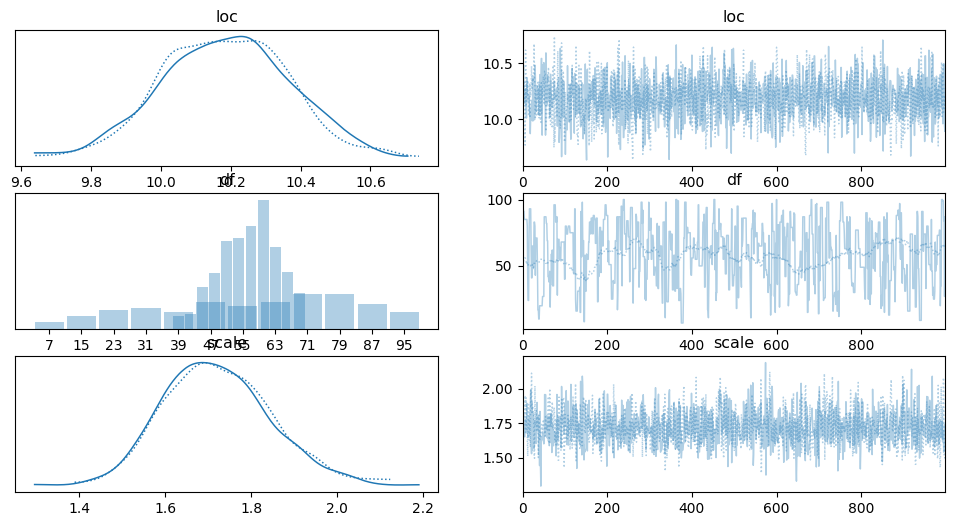

In [ ]:
import pymc as pm
import arviz as az
from scipy import stats
import numpy as np

# Parameters for generating the data
mu_0, sigma_0 = 0, 10
n, loc_true, scale_true, df_true = 100, 10, 2, 15

# Generating the data
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

# Defining the model in PyMC
with pm.Model() as model:
    # Priors
    loc = pm.Normal('loc', mu=0, sigma=10)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)

    # Likelihood
    likelihood = pm.StudentT('likelihood', mu=loc, sigma=scale, nu=df, observed=x)

    # Sampling from the model using HMC
    trace = pm.sample()

# Posterior analysis
az.plot_trace(trace)
summary = az.summary(trace)
print("Summary:\n", summary)

# Diagnostics
# A. Effective Sample Sizes
print("\nEffective Sample Sizes:\n", summary[['ess_bulk', 'ess_tail']])

# B. Chain Convergence Measures
print("\nR-hat values:\n", summary['r_hat'])

# C. Divergences
divergences = trace.sample_stats['diverging']
num_divergences = np.sum(divergences)
print("\nNumber of Divergences:", num_divergences)



# D. Metropolis-Hastings Acceptance Rates
acceptance_rate = np.mean(trace.get_sampler_stats("accept")[0])
print("\nAcceptance Rate:", acceptance_rate)




# E. Other Warnings or Concerns
# PyMC automatically prints warnings after sampling if there are issues.

